In [2]:
#utilizando o relatório que é enviado com nome de Historico Cancelamento.

In [3]:
import numpy as np 
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 
plt.style.use('fivethirtyeight')
import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline

In [4]:
sns.set_palette("Set1")

In [5]:
data = pd.read_csv('selfit/hist-canc.csv', sep = ',')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318269 entries, 0 to 318268
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   contrato             318269 non-null  int64 
 1   datacancelamento     318269 non-null  object
 2   tipocancelamento     318269 non-null  object
 3   plano                318269 non-null  object
 4   cliente              318269 non-null  object
 5   cpf                  318191 non-null  object
 6   sexo                 318269 non-null  object
 7   idadecliente         318269 non-null  int64 
 8   telefonescliente     318246 non-null  object
 9   emailscliente        318248 non-null  object
 10  qtdediaspermanencia  318269 non-null  int64 
 11  nomeunidade          318269 non-null  object
 12  estadounidade        318269 non-null  object
 13  cidadeunidade        318269 non-null  object
 14  dataultimoacesso     246136 non-null  object
dtypes: int64(3), object(12)
memory usa

In [7]:
data.head()

,contrato,datacancelamento,tipocancelamento,plano,cliente,cpf,sexo,idadecliente,telefonescliente,emailscliente,qtdediaspermanencia,nomeunidade,estadounidade,cidadeunidade,dataultimoacesso
0,1066698,2021-01-01 00:00:00,COMPULSORIO,PLANO SELF LIGHT,ALEXANDRE MAURICIO NUNES DE BARROS,859.234.325-95,MASCULINO,24,(71)996859279,alexandremauricio8@hotmail.com,120,RIO VERMELHO,BAHIA,SALVADOR,2020-01-07 21:03:15.225
1,1077205,2021-01-01 00:00:00,COMPULSORIO,PLANO SELF LIGHT,BRUNA FERNANDES CALEGARI,112.556.676-05,FEMININO,29,(16)991534099,bruna.fcoliveira@hotmail.com,105,PRESIDENTE VARGAS,SÃO PAULO,RIBEIRÃO PRETO,2020-12-17 16:00:36.384
2,1077205,2021-01-01 00:00:00,COMPULSORIO,PLANO SELF LIGHT,BRUNA FERNANDES CALEGARI,112.556.676-05,FEMININO,29,(16)991534099,bruna.fcoliveira@hotmail.com,105,PRESIDENTE VARGAS,SÃO PAULO,RIBEIRÃO PRETO,2020-12-17 16:00:36.384
3,1134727,2021-01-01 00:00:00,COMPULSORIO,PLANO SELF LIGHT,DIEGO HENRIQUE LINS SILVA,032.086.065-59,MASCULINO,33,(87)999499080,diego025@outlook.com,34,TANCREDO NEVES,PERNAMBUCO,PETROLINA,2021-07-06 16:48:04.109
4,975901,2021-01-01 00:00:00,COMPULSORIO,PLANO SELF LIGHT,ERICA MENDES DOS SANTOS,400.766.978-35,FEMININO,30,(14)997716746,mendes.erica.santos@gmail.com,333,MARILIA SHOPPING,SÃO PAULO,MARÍLIA,2020-12-19 10:09:18.547


In [8]:
data.drop(['contrato','cliente', 'cpf', 'telefonescliente', 'emailscliente', 'dataultimoacesso'],
          axis =1,
          inplace = True)

In [9]:
data.head()

,datacancelamento,tipocancelamento,plano,sexo,idadecliente,qtdediaspermanencia,nomeunidade,estadounidade,cidadeunidade
0,2021-01-01 00:00:00,COMPULSORIO,PLANO SELF LIGHT,MASCULINO,24,120,RIO VERMELHO,BAHIA,SALVADOR
1,2021-01-01 00:00:00,COMPULSORIO,PLANO SELF LIGHT,FEMININO,29,105,PRESIDENTE VARGAS,SÃO PAULO,RIBEIRÃO PRETO
2,2021-01-01 00:00:00,COMPULSORIO,PLANO SELF LIGHT,FEMININO,29,105,PRESIDENTE VARGAS,SÃO PAULO,RIBEIRÃO PRETO
3,2021-01-01 00:00:00,COMPULSORIO,PLANO SELF LIGHT,MASCULINO,33,34,TANCREDO NEVES,PERNAMBUCO,PETROLINA
4,2021-01-01 00:00:00,COMPULSORIO,PLANO SELF LIGHT,FEMININO,30,333,MARILIA SHOPPING,SÃO PAULO,MARÍLIA


In [10]:
data.isnull().sum()

datacancelamento       0
tipocancelamento       0
plano                  0
sexo                   0
idadecliente           0
qtdediaspermanencia    0
nomeunidade            0
estadounidade          0
cidadeunidade          0
dtype: int64

In [11]:
data.dtypes

datacancelamento       object
tipocancelamento       object
plano                  object
sexo                   object
idadecliente            int64
qtdediaspermanencia     int64
nomeunidade            object
estadounidade          object
cidadeunidade          object
dtype: object

In [12]:
#datas para datetime.
data['datacancelamento'] = data['datacancelamento'] = pd.to_datetime(data['datacancelamento'], format='%Y-%m-%d')

In [13]:
# cria uma coluna chamada 'mes' e coloca o mês da tabela naquela coluna kkk
data['mes'] = data['datacancelamento'].dt.month

In [14]:
data = data.loc[(data.qtdediaspermanencia >= 0)]

In [15]:
data = data.loc[(data.idadecliente > 10 ) & (data.idadecliente < 70)]

In [16]:
data = data.loc[(data.sexo != 'NAO INFORMADO')]

In [17]:
data['plano'].value_counts()

PLANO SELF LIGHT                 89294
PLANO SELF PLUS SITE             83690
PLANO SELF LIGHT SITE            71701
PLANO SELF PLUS                  52494
PLANO PLUS CORP                   3503
PLANO SELF LIGHT MENSAL            208
PLANO SELF LIGHT TOTAL             178
PLANO SELF PLUS TOTAL              145
PLANO ACOLHEDOR PLUS               105
PLANO SELF PLUS MENSAL              83
CORTESIA MENSAL LIGHT COVID19       39
PLANO CORTESIA PLUS                 36
PLANO EMBAIXADOR PLUS               27
CORTESIA MENSAL PLUS COVID19        24
DAY USE                              7
PLANO SELF LIGHT TESTE-SITE          2
Name: plano, dtype: int64

Excluindo planos que não possuem tanto peso na análise.

In [18]:

data = data.loc[(data.plano != 'PLANO SELF LIGHT TESTE-SITE') & 
                  (data.plano != 'CORTESIA MENSAL PLUS COVID19') &
                  (data.plano != 'DAY USE') &
                  (data.plano != 'CORTESIA MENSAL LIGHT COVID19') &
                  (data.plano != 'PLANO EMBAIXADOR PLUS') &
                  (data.plano != 'PLANO CORTESIA PLUS') &
                  (data.plano != 'PLANO SELF PLUS MENSAL') &
                  (data.plano != 'PLANO ACOLHEDOR PLUS') &
                  (data.plano != 'PLANO SELF LIGHT MENSAL') &
                  (data.plano != 'PLANO SELF LIGHT TOTAL') &
                  (data.plano != 'PLANO SELF PLUS TOTAL') &
                  (data.plano != 'PLANO PLUS CORP')]

In [19]:
data['plano'].value_counts()

PLANO SELF LIGHT         89294
PLANO SELF PLUS SITE     83690
PLANO SELF LIGHT SITE    71701
PLANO SELF PLUS          52494
Name: plano, dtype: int64

<b><h3> Sexo -> Variavel Categorica <h3/></b>

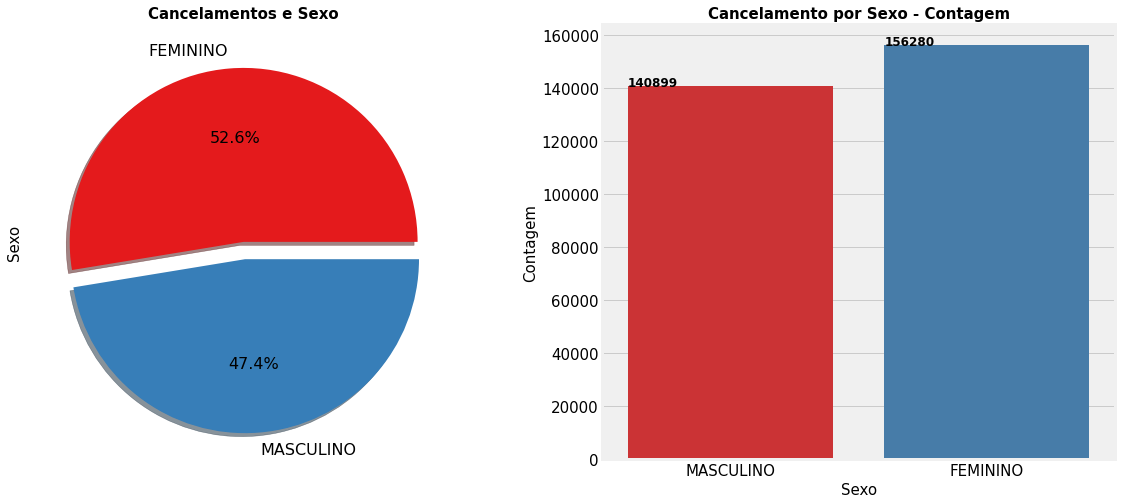

In [20]:
f, ax = plt.subplots(1,2, figsize = (18,8))
#Grafico 1
data['sexo'].value_counts().plot.pie(
    explode = [0,0.1], # tamanho do da lacuna entre os valores do gráfico de torta
                                        autopct ='%1.1f%%' , # 
                                        ax = ax[0], #indica onde será plotado a figura, na coluna 1.
                                        shadow = True,
                                        fontsize = 16                         
)
ax[0].set_title("Cancelamentos e Sexo", fontsize = 15, fontweight = 'bold')
ax[0].set_ylabel("Sexo", fontsize =15)

#Grafico 2
b = sns.countplot('sexo',
              data = data,
              ax = ax[1],
              )
b.tick_params(labelsize= 15)
b.set_yticks(range(0,180000, 20000))
ax[1].set_title("Cancelamento por Sexo - Contagem", fontsize = 15, fontweight = 'bold')
ax[1].set_ylabel("Contagem", fontsize = 15)
ax[1].set_xlabel("Sexo", fontsize = 15)
for i in ax[1].patches:
    # get_width pulls left or right; get_y pushes up or down
    ax[1].text(i.get_x(), i.get_height(), \
            str(round((i.get_height()), 1)),
            fontsize=12,
            color='black',
           weight = 'bold')

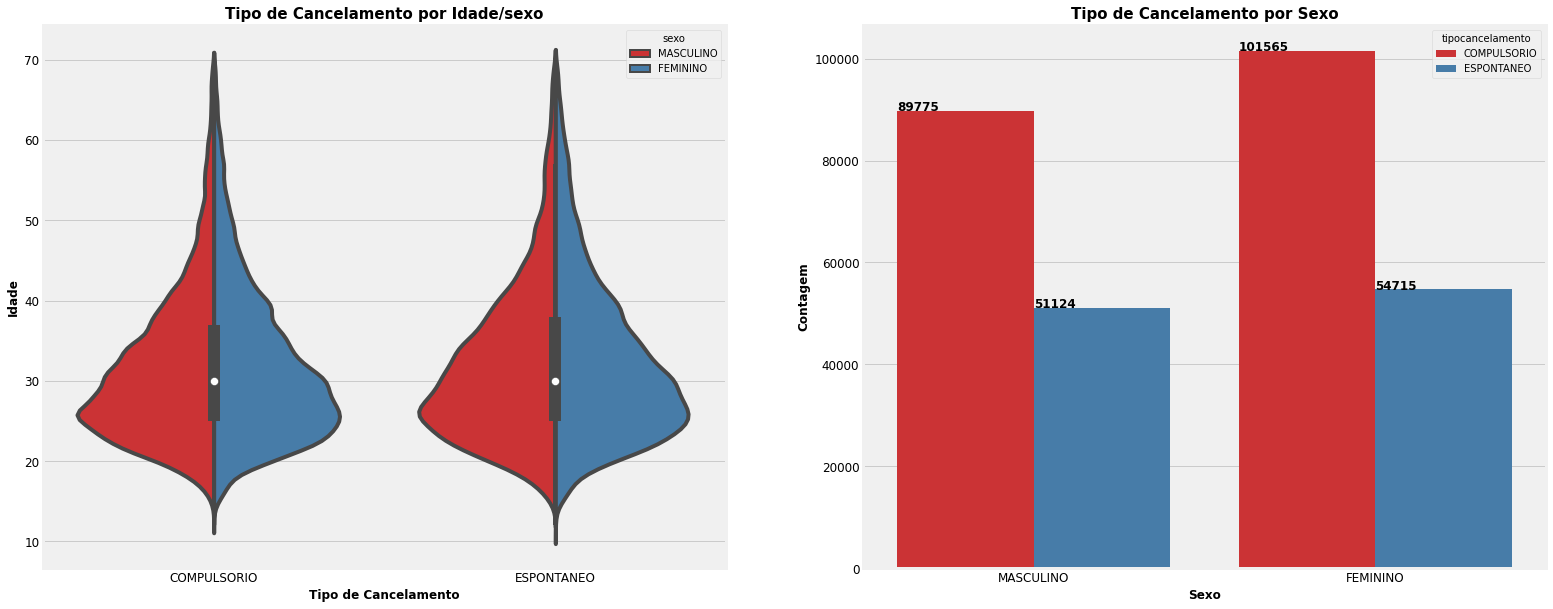

In [21]:
f, ax = plt.subplots(1, 2, figsize = (24,10))

sns.violinplot('tipocancelamento',
               'idadecliente',
               hue = 'sexo',
               split = True,
               data = data,
               ax = ax[0])
ax[0].set_title("Tipo de Cancelamento por Idade/sexo", fontsize = 15, fontweight = 'bold')
ax[0].set_xlabel("Tipo de Cancelamento", fontsize = 12, fontweight = 'bold')
ax[0].set_ylabel("Idade", fontsize = 12, fontweight = 'bold')
ax[0].tick_params(labelsize =12)


sns.countplot('sexo',
              hue = 'tipocancelamento',
              data = data,
              ax = ax[1])

ax[1].set_title("Tipo de Cancelamento por Sexo", fontsize = 15, fontweight = 'bold')
ax[1].set_ylabel("Contagem", fontsize = 12, fontweight = 'bold')
ax[1].set_xlabel("Sexo", fontsize = 12, fontweight = 'bold')
ax[1].tick_params(labelsize =12)
for i in ax[1].patches:
    # get_width pulls left or right; get_y pushes up or down
    ax[1].text(i.get_x(), i.get_height(), \
            str(round((i.get_height()), 1)),
            fontsize=12,
            color='black',
           weight = 'bold')


sexo e tipocancelamento são indiferentes quando observados com uma massa grande, porém, podemos perceber levemente que o **ViolinPlot** possui menor afunilamento no topo para o sexo feminino, dizendo que as mulheres tem maior presença nas academias conforme a idade aumenta.

In [22]:
data_idade_20_30 = data.loc[(data.idadecliente >= 20) & (data.idadecliente <= 30)]
data_idade_30_40 = data.loc[(data.idadecliente > 30) & (data.idadecliente <= 40)]
data_idade_40_60 = data.loc[(data.idadecliente > 40) & (data.idadecliente <= 60)]
#total
data_idade_20_60 = data.loc[(data.idadecliente >= 20) & (data.idadecliente <= 60)]

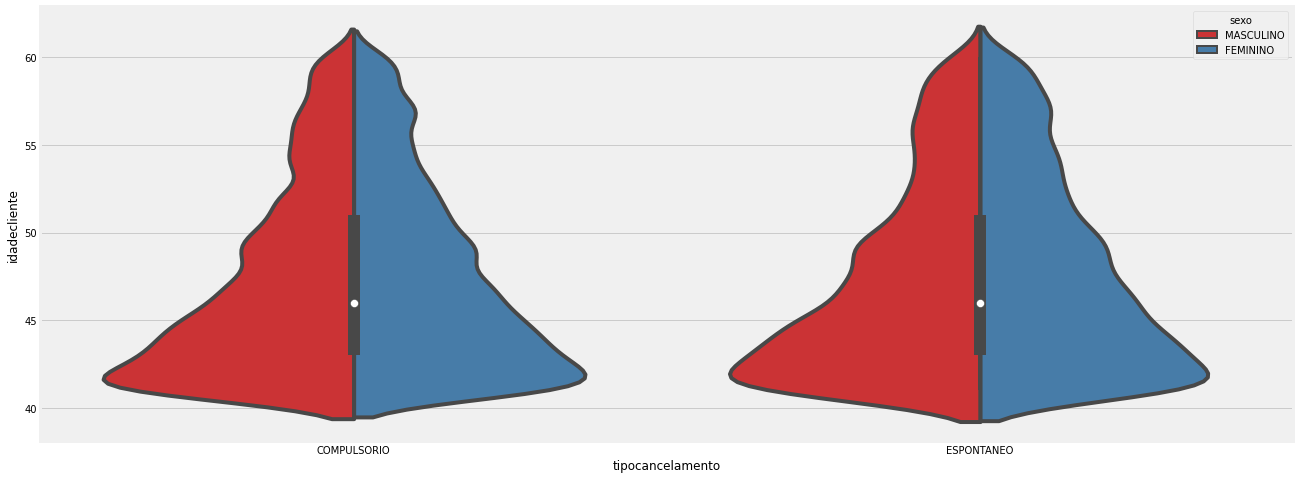

In [23]:
sns.violinplot('tipocancelamento', 
               'idadecliente',
               hue = 'sexo',
               data = data_idade_40_60,
               split = True,
               )
fig = plt.gcf()
fig.set_size_inches(20,8)

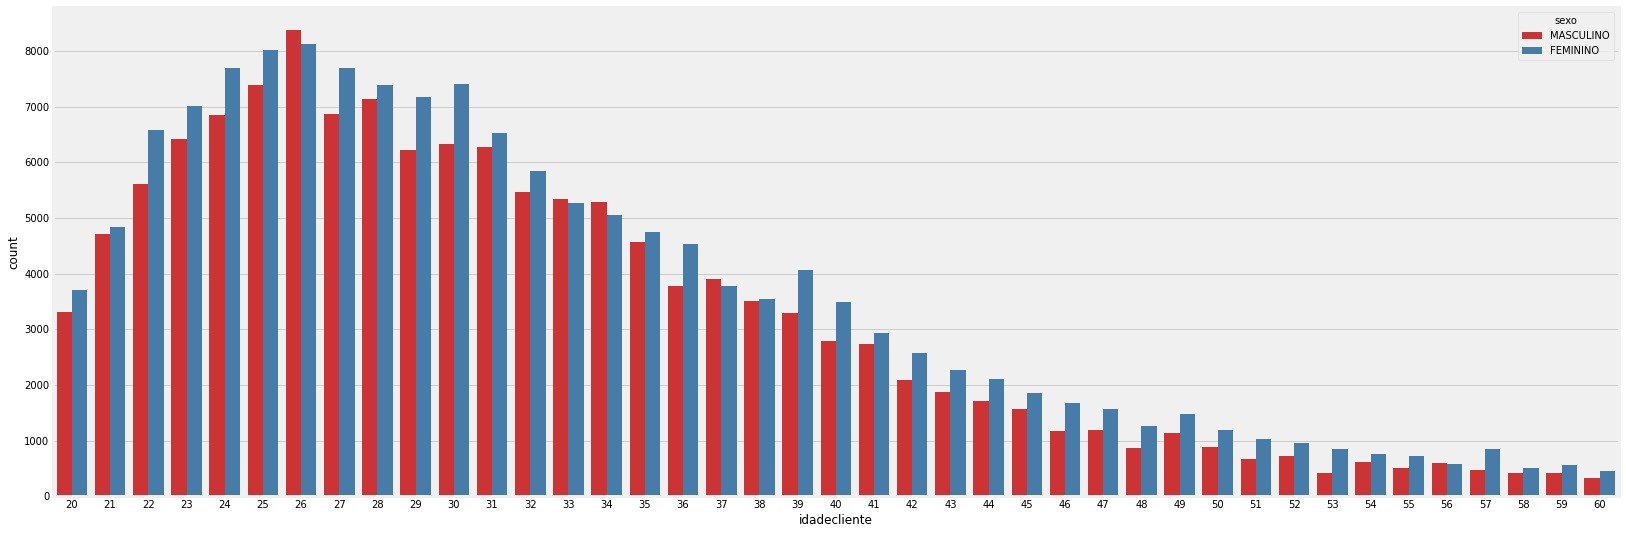

In [24]:
ax = sns.countplot('idadecliente',
              hue = 'sexo',
              data = data_idade_20_60)

    
plt.gcf().set_size_inches(25,9)

Aplicando zoom das idades de 20 a 40 e depois de 41 a 60, temos:

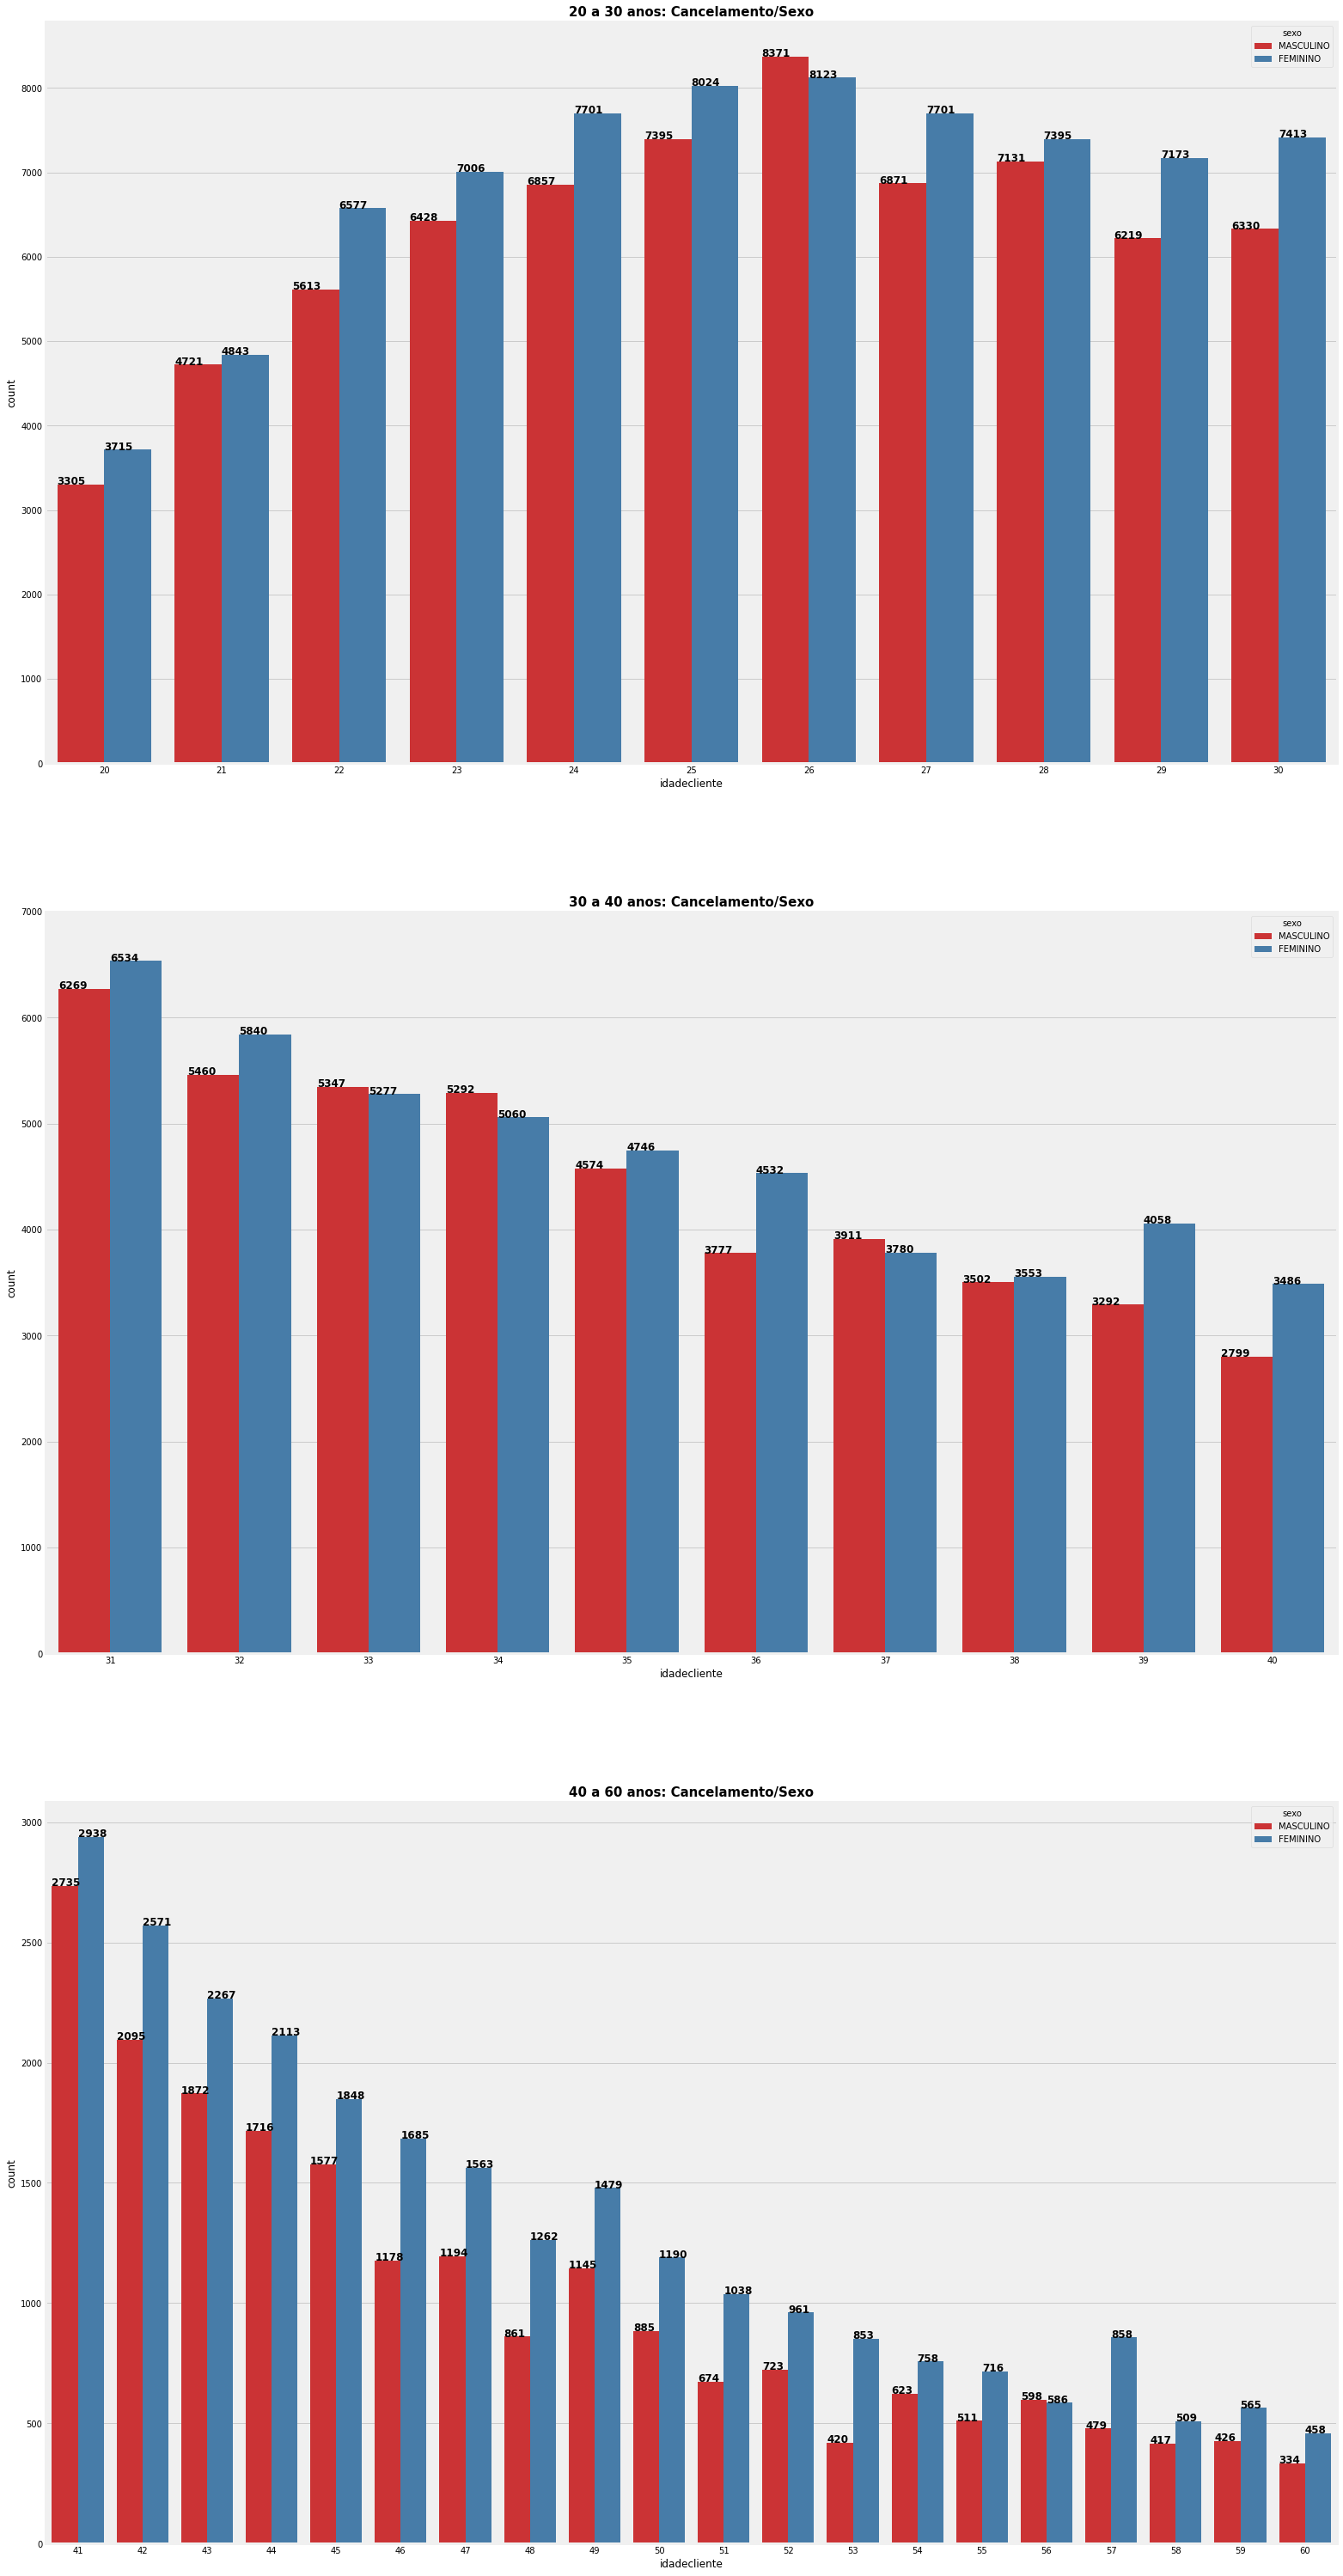

In [25]:
f, ax = plt.subplots(3,1, figsize = (24,54))
#figura 1
sns.countplot('idadecliente',
              hue = 'sexo',
              data = data_idade_20_30,
              ax = ax[0])
ax[0].set_yticks(range(0,9000, 1000))
for i in ax[0].patches:
    ax[0].text(i.get_x(), i.get_height(), str(i.get_height()),fontsize=12,color='black',weight = 'bold')
    
ax[0].set_title("20 a 30 anos: Cancelamento/Sexo", fontsize = 15, fontweight = 'bold')

#figura 2
sns.countplot('idadecliente',
              hue = 'sexo',
              data = data_idade_30_40,
              ax = ax[1])

ax[1].set_yticks(range(0,8000, 1000))
for i in ax[1].patches:
    ax[1].text(i.get_x(), i.get_height(), str(i.get_height()),fontsize=12,color='black',weight = 'bold')
    
ax[1].set_title("30 a 40 anos: Cancelamento/Sexo", fontsize = 15, fontweight = 'bold')
#figura 3
sns.countplot('idadecliente',
            hue = 'sexo',
            data = data_idade_40_60,
            ax = ax[2])

for i in ax[2].patches:
    ax[2].text(i.get_x(), i.get_height(), str(i.get_height()),fontsize=12,color='black',weight = 'bold')
    

ax[2].set_title("40 a 60 anos: Cancelamento/Sexo", fontsize = 15, fontweight = 'bold')


plt.show()

Quando aplicamos zoom no gráfico, podemos que a hipótese acima é válida, pois temos:

1) **de 20 a 30 anos:** Para cada idade, mulheres têm predominância de cerca de 10% a mais para cada idade.
2) **de 30 a 40 anos:** A predominância de mulheres nessa idade é também cerca de 10%, porem chegando perto dos 40 anos (39 e 40) tem os maiores valores, chegando a 20% de predominância feminina.
3) **40 a 60 anos:** A predominância feminina é ainda maior, chegando a 30% média, com resultados de 44% na idade de 57 anos.



<b><h3>Plano -> Variável Categórica</h3></b>


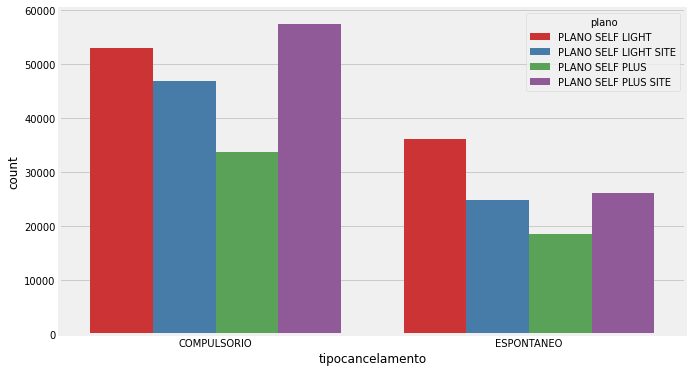

In [26]:
sns.countplot("tipocancelamento",
              hue = "plano",
              data = data)

fig = plt.gcf()

fig.set_size_inches(10,6)

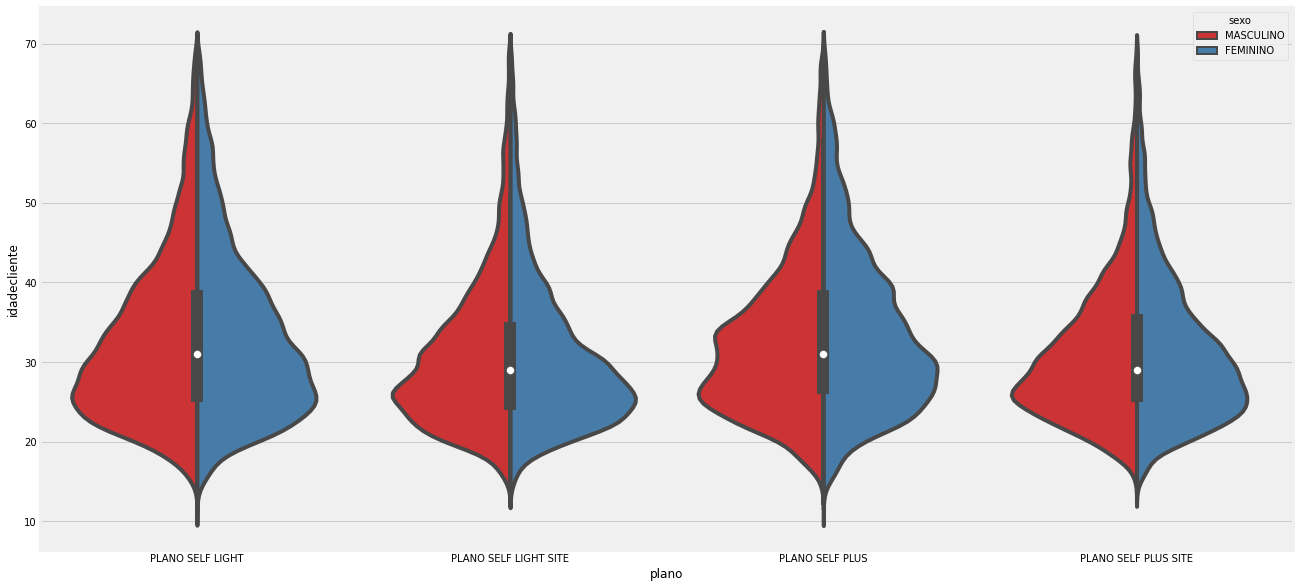

In [27]:
sns.violinplot('plano',
               'idadecliente',
               hue = 'sexo',
               split = True,
               data = data)

fig = plt.gcf()

fig.set_size_inches(20,10)

Quando separamos por plano, as coisas ficam mais interessantes. Podemos observar comportamentos diferentes para cada um dos planos.

1) Planos vindos do **Site** são assinados por uma população mais jovem **"20-30 anos"**, enquanto planos feitos no **Balcão** são assinados por uma gama maior de idade, que encobre dos **20-30** em maioria, mas caindo levemente nos **30-40**.

2) Mulheres ainda tem pico do violino maior do que os homens.

In [28]:
data_plano_site = data.loc[(data.plano == 'PLANO SELF LIGHT SITE') | (data.plano == 'PLANO SELF PLUS SITE')]
data_plano_balcao = data.loc[(data.plano != 'PLANO SELF LIGHT SITE') & (data.plano != 'PLANO SELF PLUS SITE')]

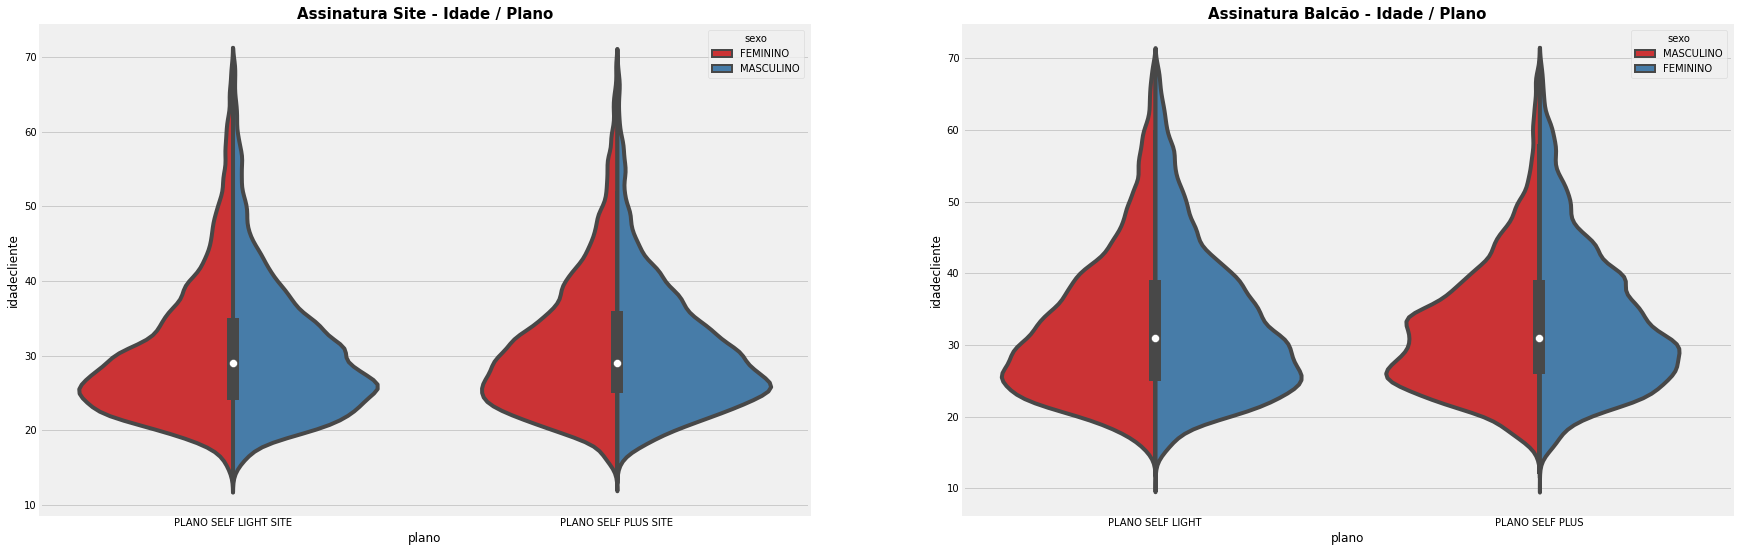

In [29]:
f, ax = plt.subplots(1,2, figsize = (27,9))

sns.violinplot('plano',
               'idadecliente',
               hue = 'sexo',
               data = data_plano_site,
               split = True,
               ax = ax[0])
ax[0].set_title("Assinatura Site - Idade / Plano", fontsize = 15, fontweight = 'bold')

sns.violinplot('plano',
               'idadecliente',
               hue = 'sexo',
               data = data_plano_balcao,
               split = True,
               ax = ax[1])
ax[1].set_title("Assinatura Balcão - Idade / Plano", fontsize = 15, fontweight = 'bold')

plt.show()

<center><h1>TESTES!!</h1></center>


In [30]:
data.dtypes

datacancelamento       datetime64[ns]
tipocancelamento               object
plano                          object
sexo                           object
idadecliente                    int64
qtdediaspermanencia             int64
nomeunidade                    object
estadounidade                  object
cidadeunidade                  object
mes                             int64
dtype: object

In [41]:
data_permanencia = data.loc[(data.qtdediaspermanencia >= 0) & (data.qtdediaspermanencia < 400)]

<AxesSubplot:xlabel='qtdediaspermanencia'>

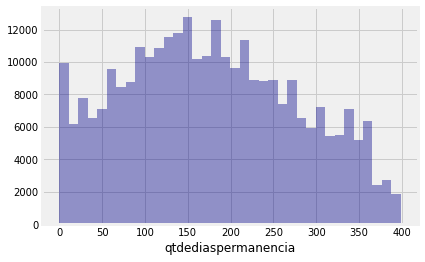

In [42]:
ax = sns.distplot(data_permanencia['qtdediaspermanencia'], hist =True, kde = False, bins = int(180/5), color = 'darkblue')

ax

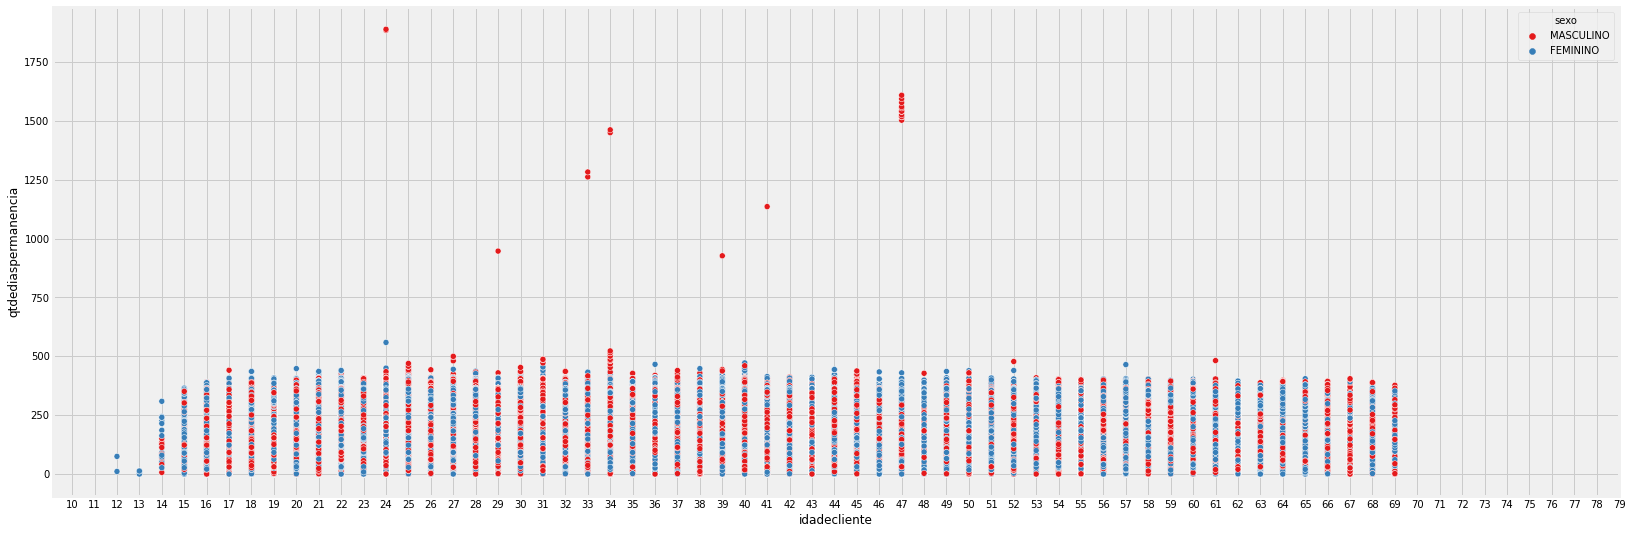

In [ ]:
a = sns.scatterplot(x = 'idadecliente', y ='qtdediaspermanencia', data = data, hue = 'sexo')
a.set_xticks(range(10,80,1))
fig = plt.gcf()
fig.set_size_inches(25,9)


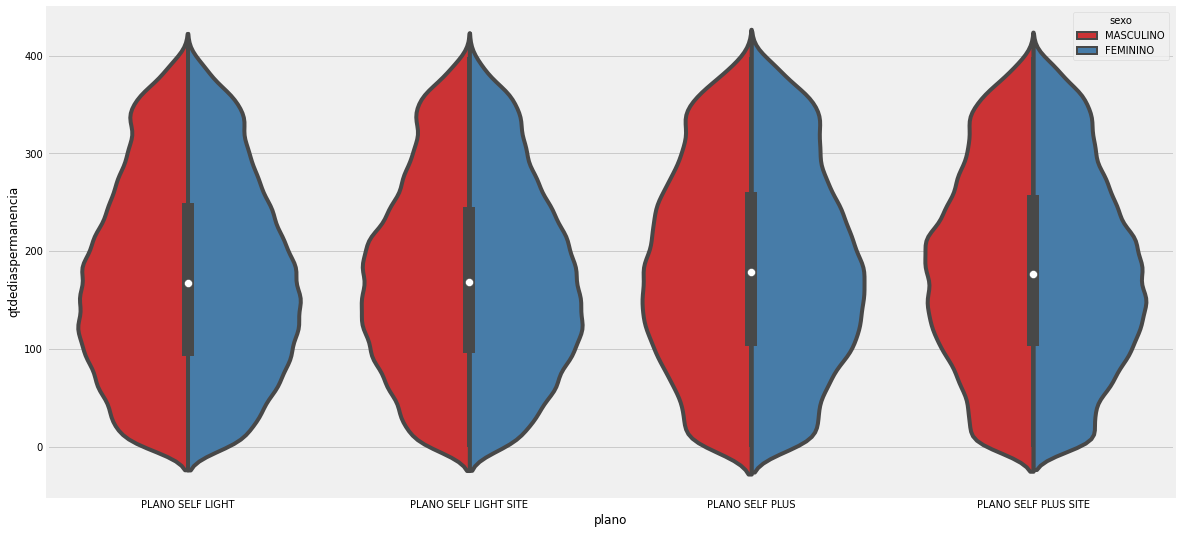

In [ ]:
data_permanencia = data.loc[(data.qtdediaspermanencia >= 0) & (data.qtdediaspermanencia < 400)]

sns.violinplot('plano',
               'qtdediaspermanencia',
               hue = 'sexo',
               split = True,
               data = data_permanencia)


plt.gcf().set_size_inches(18,9)

In [ ]:
#------------------------------------------------------------------------------------------------

In [ ]:
data.dtypes

datacancelamento       datetime64[ns]
tipocancelamento               object
plano                          object
sexo                           object
idadecliente                    int64
qtdediaspermanencia             int64
nomeunidade                    object
estadounidade                  object
cidadeunidade                  object
mes                             int64
dtype: object

In [ ]:
data_estado_SP = data.loc[(data.estadounidade == 'SÃO PAULO')]

pd.crosstab([data_estado_SP.estadounidade ,data_estado_SP.cidadeunidade, data_estado_SP.nomeunidade],
            [ data_estado_SP.mes],
            margins = False).style.background_gradient(cmap = 'RdYlGn')

In [ ]:
data_cidade_salvador = data.loc[(data.cidadeunidade == 'SALVADOR')]

pd.crosstab([data_cidade_salvador.cidadeunidade, data_cidade_salvador.nomeunidade],
            [ data_cidade_salvador.mes],
            margins = True).style.background_gradient(cmap = 'summer_r')

In [ ]:
pd.crosstab([data.estadounidade ,data.cidadeunidade, data.nomeunidade],
            [ data.mes],
            margins = False).style.background_gradient(cmap = 'RdYlGn')

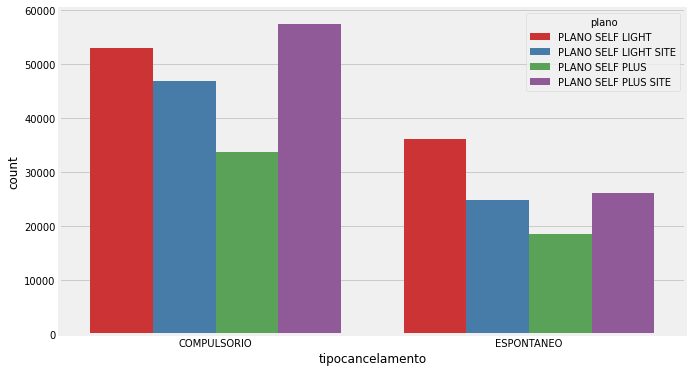

In [ ]:
sns.countplot("tipocancelamento",
              hue = "plano",
              data = data)

fig = plt.gcf()

fig.set_size_inches(10,6)

In [ ]:
pd.crosstab([data.sexo, data.mes],
            [data.tipocancelamento],
            margins = True).style.background_gradient(cmap = 'viridis')

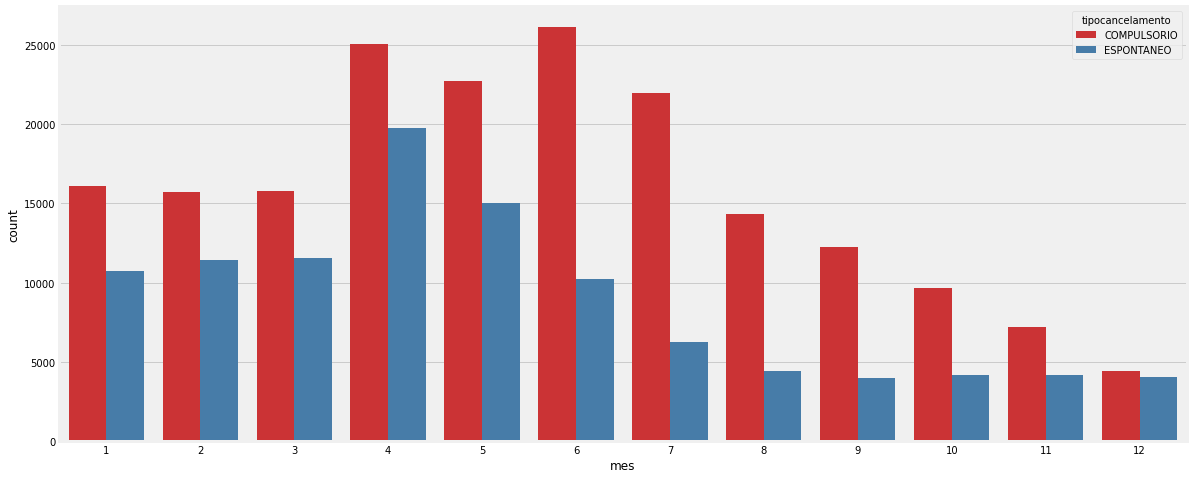

In [ ]:
sns.countplot('mes',data = data, hue = 'tipocancelamento')

fig = plt.gcf()
fig.set_size_inches(18,8)